<a href="https://www.kaggle.com/code/krishnaprasad2608/understanding-player-engagement?scriptVersionId=191581916" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This project aims to leverage data analytics to gain insights into player behavior, engagement, and performance. By analyzing various player-related metrics, the goal is to enhance game development and quality verification strategies. This project will utilize a dataset that includes detailed player information, game interactions, and performance metrics.

# Goals of the Project

* **Understand the Impact of Gender on In-Game Purchases:** Assess whether different genders have a statistically significant effect on the likelihood of making in-game purchases. This analysis helps in understanding gender-based purchasing behavior.

* **Analyze the Relationship Between Game Genre and Engagement Level:** Determine how different game genres affect player engagement levels. This goal aims to identify if certain genres contribute more to higher engagement or retention.

* **Investigate the Effect of In-Game Purchases on Engagement Level:** Evaluate whether players who make in-game purchases tend to have different engagement levels compared to those who do not. This helps in understanding the link between spending behavior and player retention.

* **Examine the Influence of Location on Engagement Level:** Explore how geographic location impacts player engagement levels. This analysis may reveal regional patterns in player behavior and retention.

* **Determine How Game Difficulty Affects Engagement Level:** Analyze whether the difficulty level of the game has an impact on player engagement. This goal seeks to identify if the game’s difficulty contributes to higher or lower levels of player retention.

* **Explore the Relationship Between Sessions Per Week and Average Session Duration:** Investigate how the frequency of gaming sessions correlates with the duration of each session. This analysis helps in understanding how session frequency influences session length.

* **Modeling and Predictive Analysis:** Use various machine learning models (Logistic Regression, Random Forest, Gradient Boosting, SVM, LightGBM, Decision Tree) to predict player engagement levels based on the features provided. The goal is to develop accurate predictive models for engagement levels to drive insights into player behavior and retention strategies.

# **Data Description**

The dataset used in this analysis contains the following fields:

* **PlayerID:** Unique identifier for each player.
* **Age:** Age of the player.
* **Gender:** Gender of the player.
* **Location:** Geographic location of the player.
* **GameGenre:** Genre of the game the player is engaged in.
* **PlayTimeHours:** Average hours spent playing per session.
* **InGamePurchases:** Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
* **GameDifficulty:** Difficulty level of the game.
* **SessionsPerWeek:** Number of gaming sessions per week.
* **AvgSessionDurationMinutes:** Average duration of each gaming session in minutes.
* **PlayerLevel:** Current level of the player in the game.
* **AchievementsUnlocked:** Number of achievements unlocked by the player.
* **EngagementLevel:** Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

# Initial ANalysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/gaming-behaviour/online_gaming_behavior_dataset.csv')

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\n")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), 

In [4]:
# Display summary statistics of the dataset
print("Summary Statistics:")
print(df.describe())
print("\n")

Summary Statistics:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000 

In [5]:
# Check for null values in each column
print("Null Values in Each Column:")
print(df.isnull().sum())

Null Values in Each Column:
PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


# Exploratory Data Analysis(EDA)

In [6]:
# Map InGamePurchases values to 'Yes' and 'No'
df['InGamePurchases'] = df['InGamePurchases'].map({0: 'No', 1: 'Yes'})

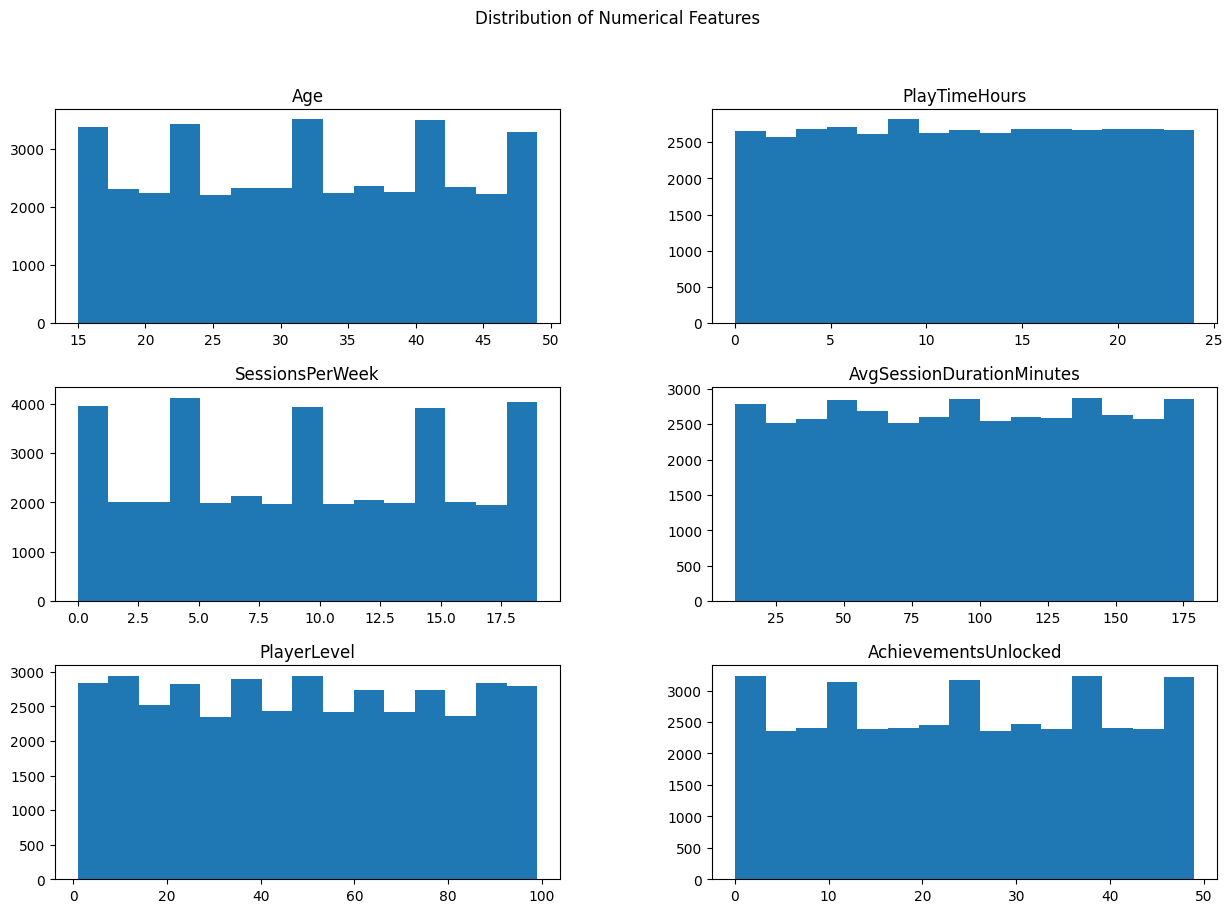

In [7]:
# Visualize the distribution of numerical features
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 2), grid=False)
plt.suptitle('Distribution of Numerical Features')
plt.show()

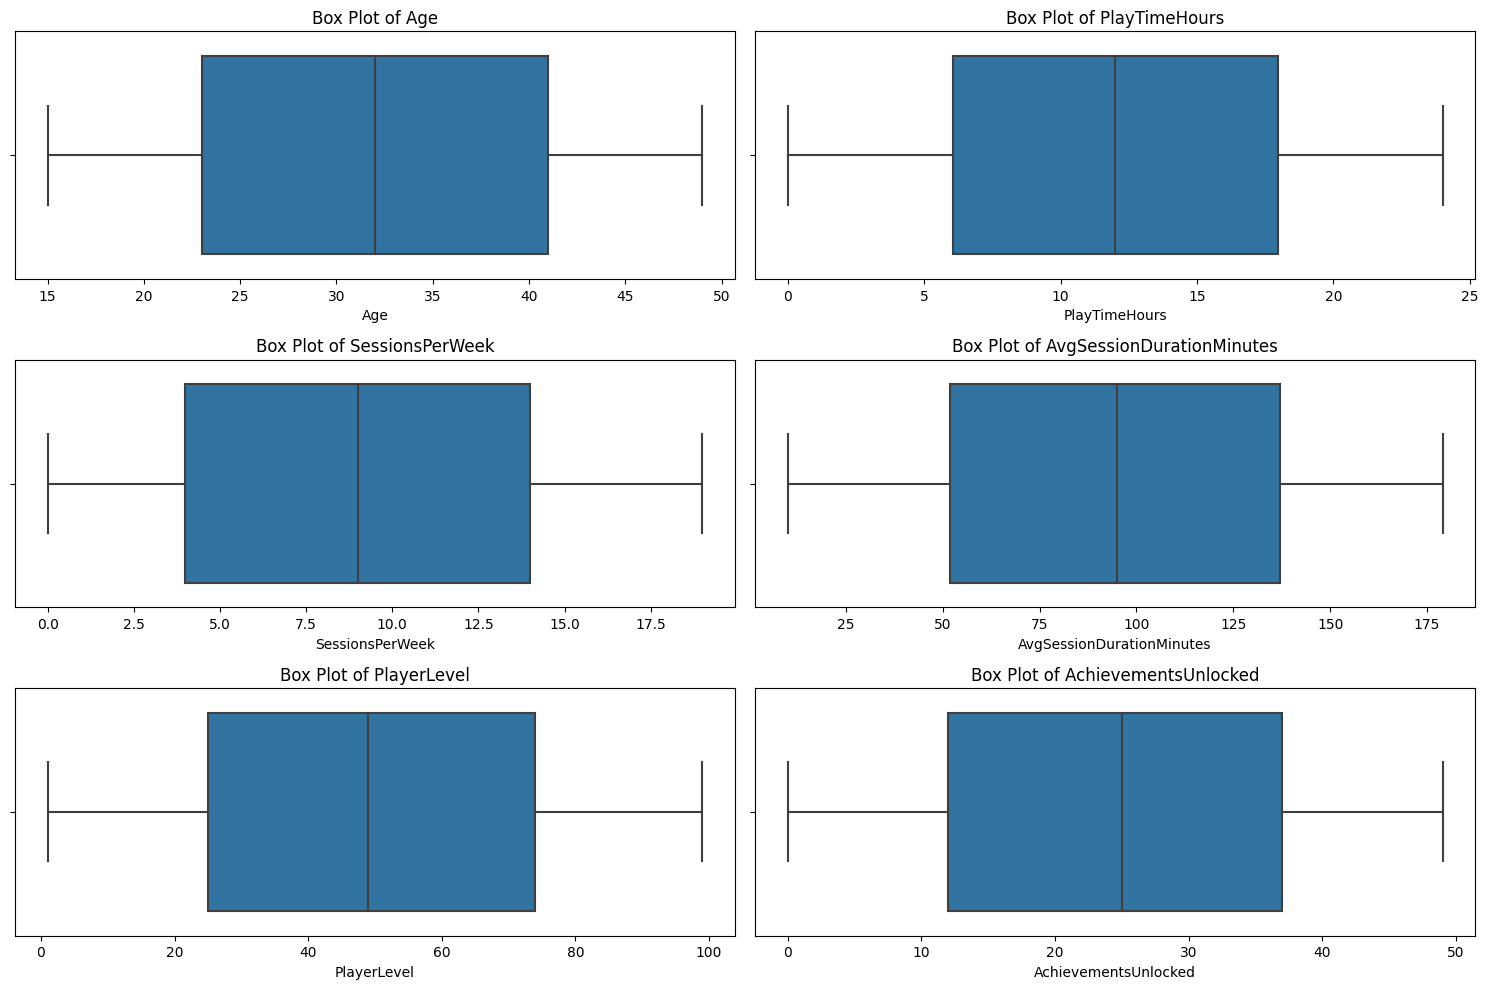

In [8]:
# Box plots to check for outliers in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.grid(False)
plt.tight_layout()
plt.show()

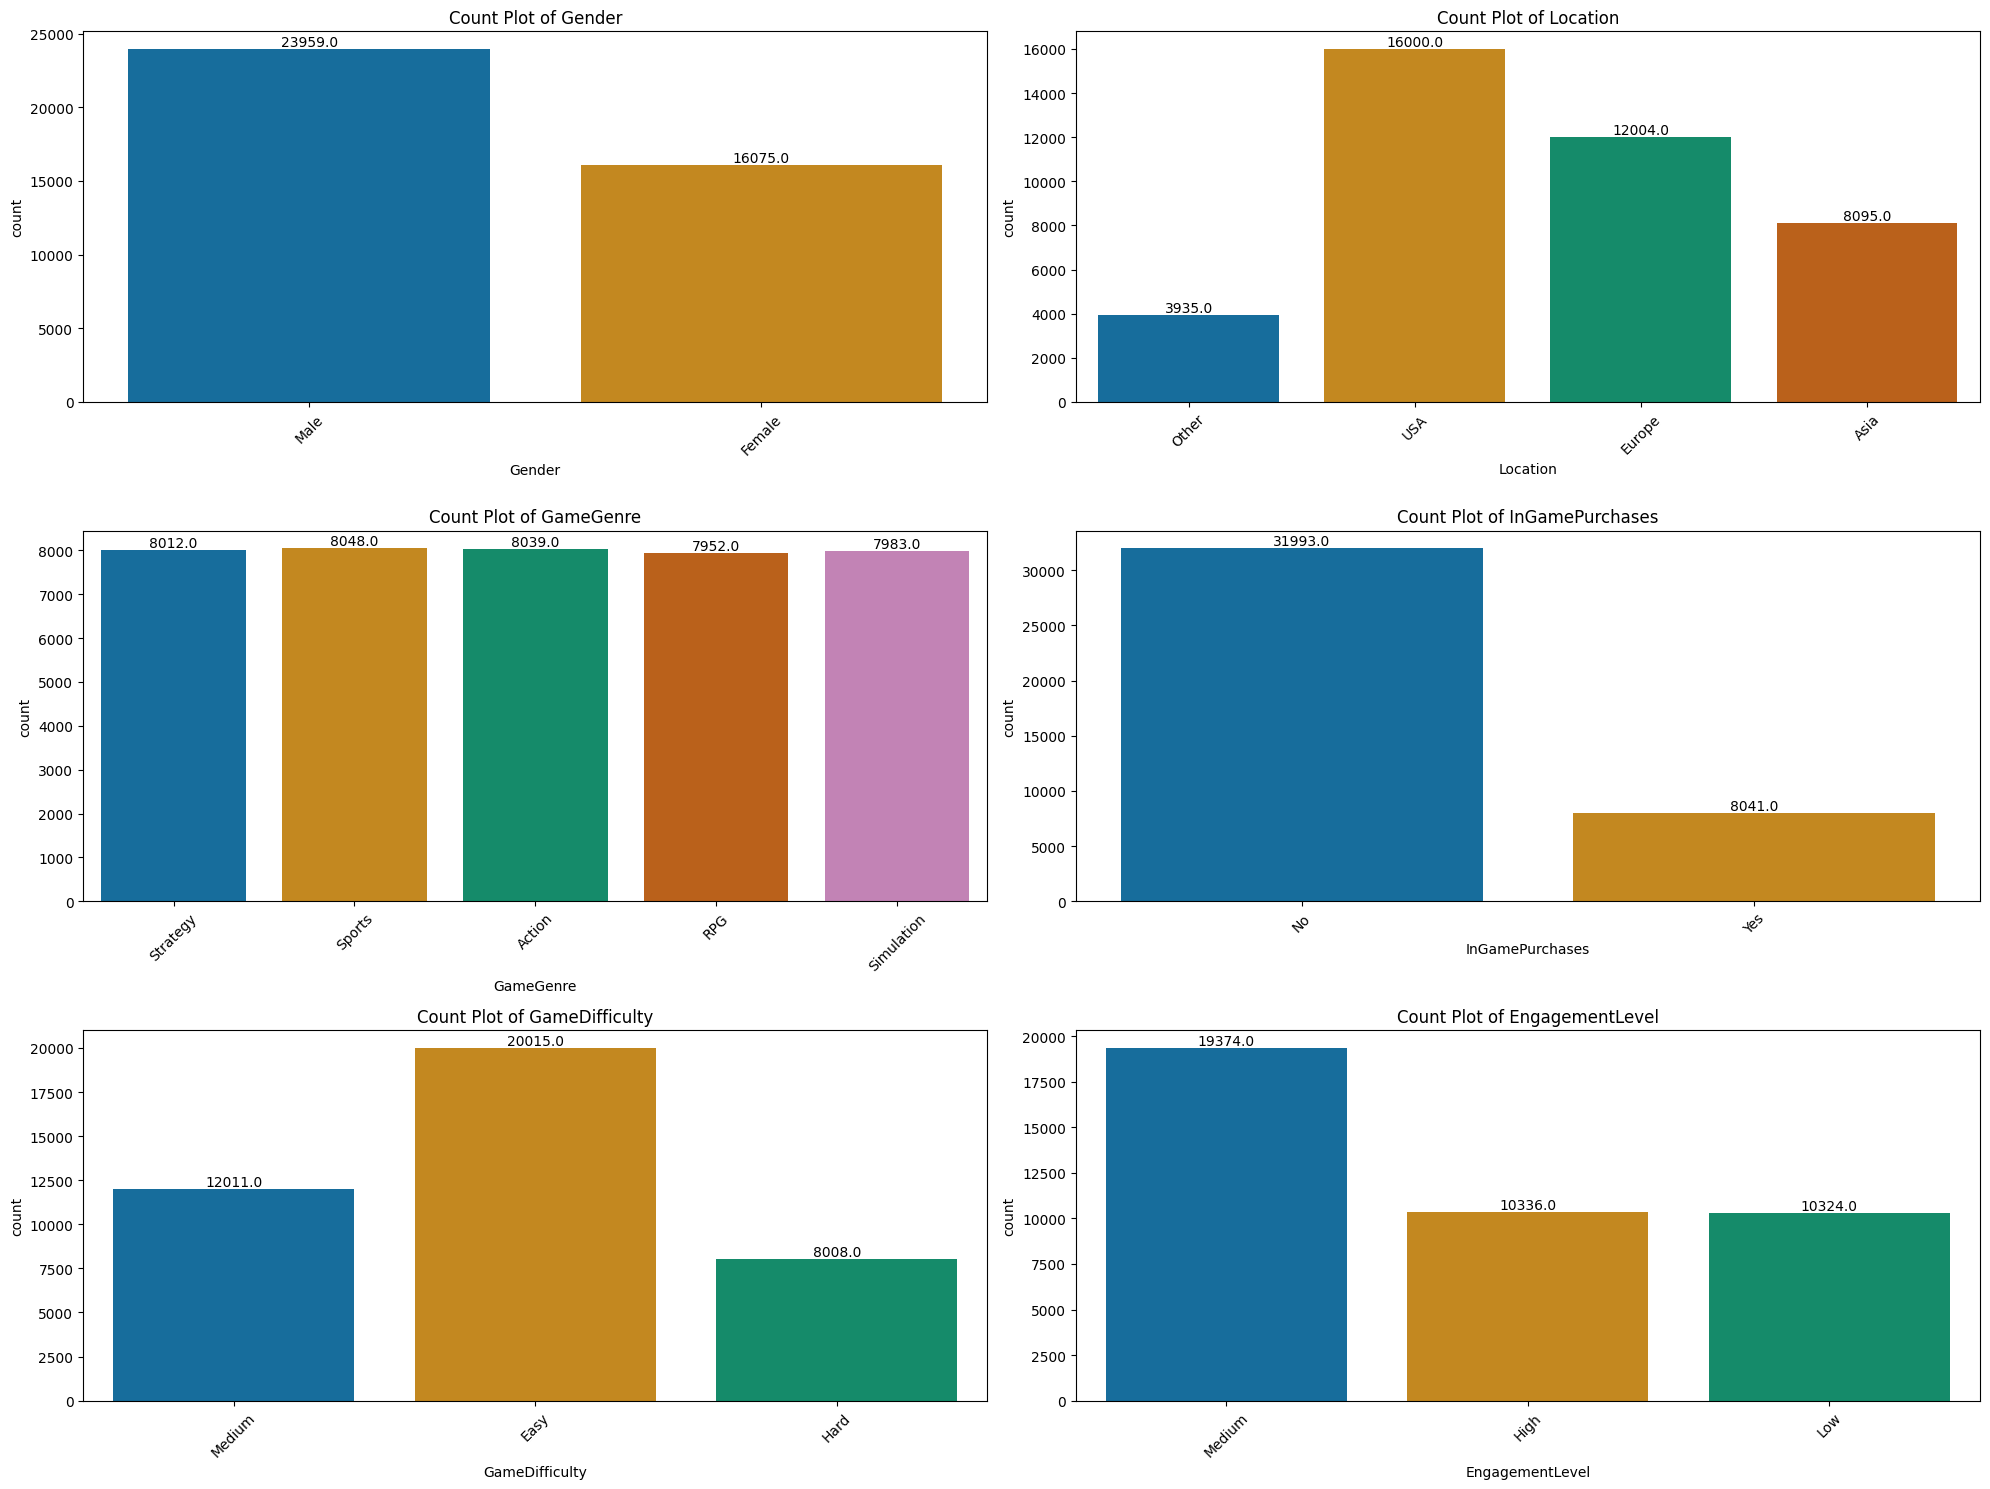

In [9]:
#color palette
palette = sns.color_palette("colorblind")

# Count plots for categorical variables with counts above each bar
categorical_features = ['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty', 'EngagementLevel']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[feature], palette=palette)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.grid(False)

    # Add counts above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

**Inferences:**

* **More Male Gamers:** The dataset exhibits a significantly larger male user base compared to female users.
* **US Focus:** A substantial portion of users are located in the USA, with a notable presence from other regions.
* **Gaming Preferences:** Strategy and sports games are the most popular genres among users, followed by RPGs and simulations.
* **In-App Purchases:** Only a decent number of players have made in-game purchases.
* **Game Difficulty:** Most players prefer "Easy" difficulty (around 20,000 players), followed by "Medium" (around 12,000 players), and then "Hard" (around 8,000 players).
* **Engagement Level:** The majority of players have a "Medium" engagement level (around 20,000 players), with fewer players having "High"  and "Low"  engagement.

In [10]:
# Define a colorblind-friendly palette if needed
palette = sns.color_palette('colorblind')

# Function to add counts above bars
def add_counts(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 3), textcoords='offset points')

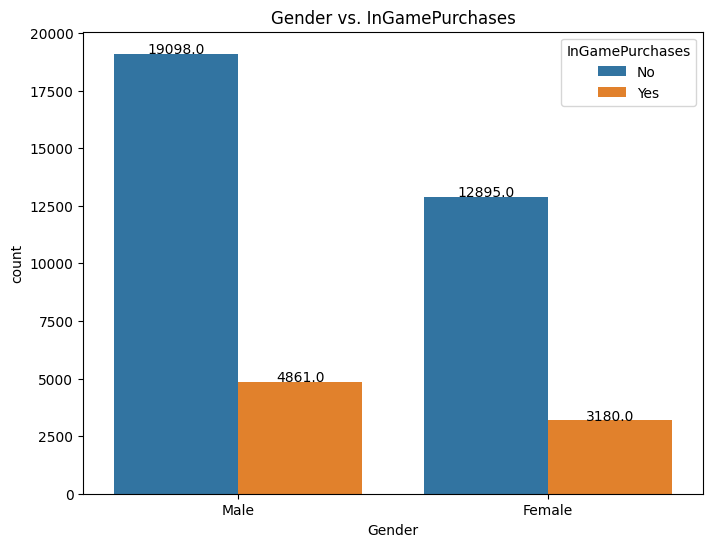

In [11]:
# Gender vs. InGamePurchases
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Gender', hue='InGamePurchases')
plt.title('Gender vs. InGamePurchases')
add_counts(ax)
plt.show()

**Inferences:**

* **More Male Gamers:** The graph shows a significantly larger number of male players compared to female players.
* **In-Game Purchases:** Both male and female players make in-game purchases, with the number of male players making purchases being substantially higher than female players.
* **Purchase Rate:** Although there are fewer female players, their in-game purchase rate is higher compared to male players.

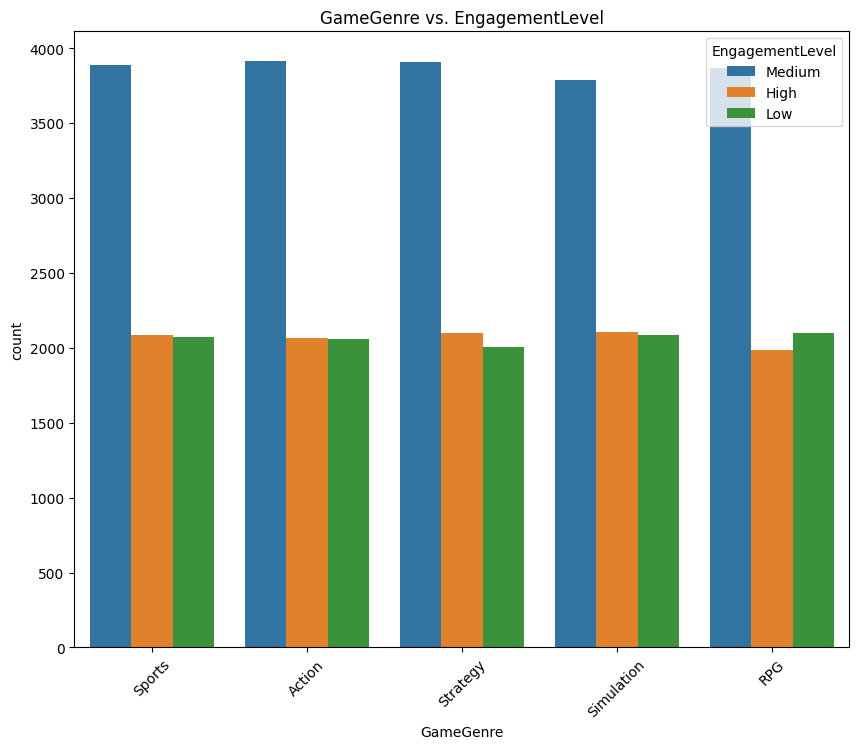

In [12]:
# GameGenre vs. EngagementLevel
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='GameGenre', hue='EngagementLevel', order=df['GameGenre'].value_counts().index)
plt.title('GameGenre vs. EngagementLevel')
plt.xticks(rotation=45)
plt.show()

* **Medium Engagement Dominates:** Across all game genres, "Medium" engagement level is the most prevalent, followed by "High" and then "Low" engagement levels.

* **Pattern:** This pattern suggests that players across these genres tend to exhibit a similar range of engagement levels, from low to high. There's no strong dominance of any particular engagement level in these genres.

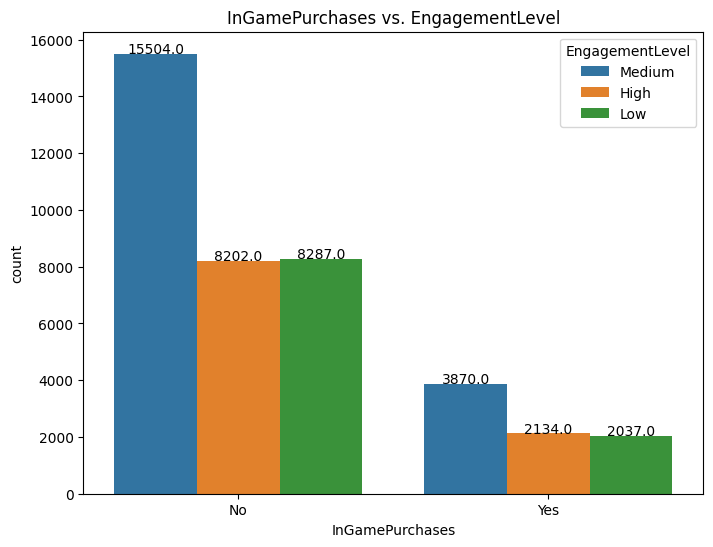

In [13]:
# InGamePurchases vs. EngagementLevel
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='InGamePurchases', hue='EngagementLevel')
plt.title('InGamePurchases vs. EngagementLevel')
add_counts(ax)
plt.show()

* **Medium Engagement Dominates:** Across both groups (those who make in-game purchases and those who don't), the "Medium" engagement level is the most prevalent.

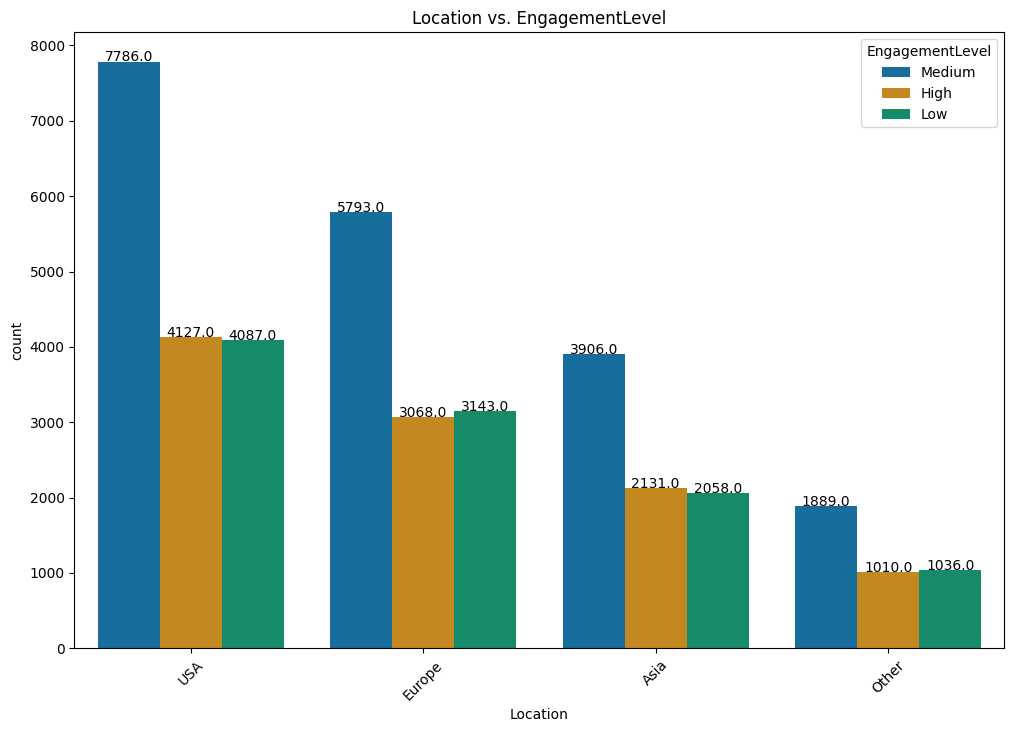

In [14]:
# Location vs. EngagementLevel
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Location', hue='EngagementLevel', palette=palette, order=df['Location'].value_counts().index)
plt.title('Location vs. EngagementLevel')
plt.xticks(rotation=45)
add_counts(ax)
plt.show()

* **Engagement Level Varies by Location:** The level of engagement differs across different locations. The USA has the highest number of players at all engagement levels, followed by Europe, Asia, and Other.

* **Medium Engagement Dominates:** Across all locations, "Medium" engagement level is the most prevalent, followed by "High" and then "Low" engagement levels.

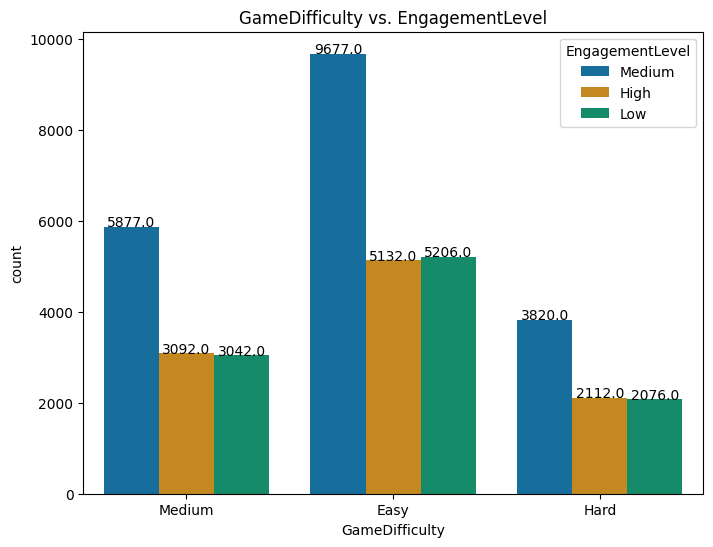

In [15]:
# GameDifficulty vs. EngagementLevel
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='GameDifficulty', hue='EngagementLevel', palette=palette)
plt.title('GameDifficulty vs. EngagementLevel')
add_counts(ax)
plt.show()

* **Engagement Level Varies by Difficulty:** The distribution of engagement levels differs across game difficulties. For example, "Easy" difficulty has a higher proportion of "High" engagement players compared to "Medium" or "Hard."

* **Medium Difficulty Leads to Balanced Engagement:** "Medium" difficulty attracts a relatively balanced distribution of engagement levels, with a significant number of players in each category (High, Medium, and Low).

* **Hard Difficulty and Low Engagement:** "Hard" difficulty has the lowest overall number of players, and a higher proportion of them exhibit "Low" engagement. This suggests that players might find this difficulty level too challenging, leading to decreased engagement.

* **Easy Difficulty and High Engagement:** "Easy" difficulty shows a higher proportion of "High" engagement players compared to other difficulties. This could indicate that players enjoy the challenge but find it manageable, leading to increased engagement.

In [16]:
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

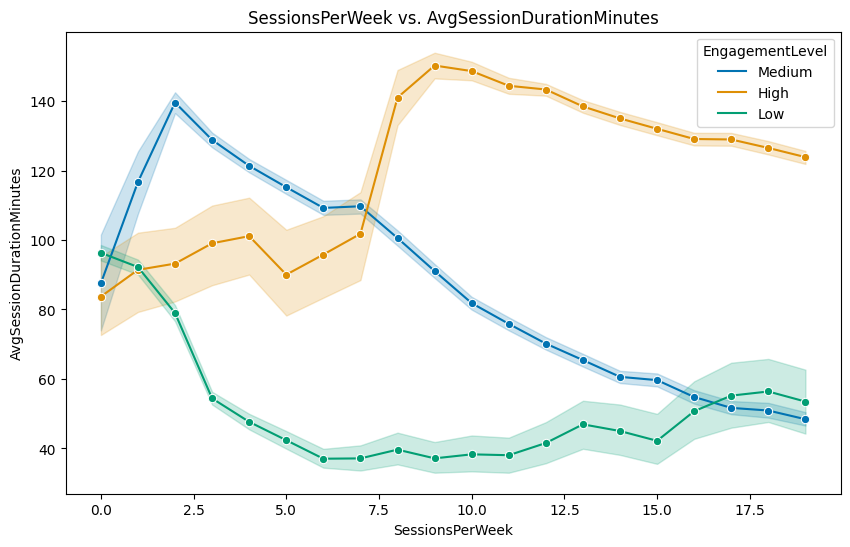

In [17]:
# SessionsPerWeek vs. AvgSessionDurationMinutes
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='SessionsPerWeek', y='AvgSessionDurationMinutes', hue='EngagementLevel', palette=palette, marker='o')
plt.title('SessionsPerWeek vs. AvgSessionDurationMinutes')
plt.show()

* **High Engagement, High Frequency:** Users with high engagement levels tend to have more gaming sessions per week compared to other groups.
* **Low Engagement, Low Frequency:** Conversely, users with low engagement levels have fewer gaming sessions per week.
* **Session Duration Decreases with Frequency:** As the number of sessions per week increases, especially for highly engaged users, the average session duration tends to decrease.
* **Medium Engagement, Balanced Behavior:** Users with medium engagement levels show a more balanced pattern between session frequency and duration, without strong trends.
* **Individual Variation:** There's significant variability in session duration within each engagement group, suggesting diverse gaming habits among players.

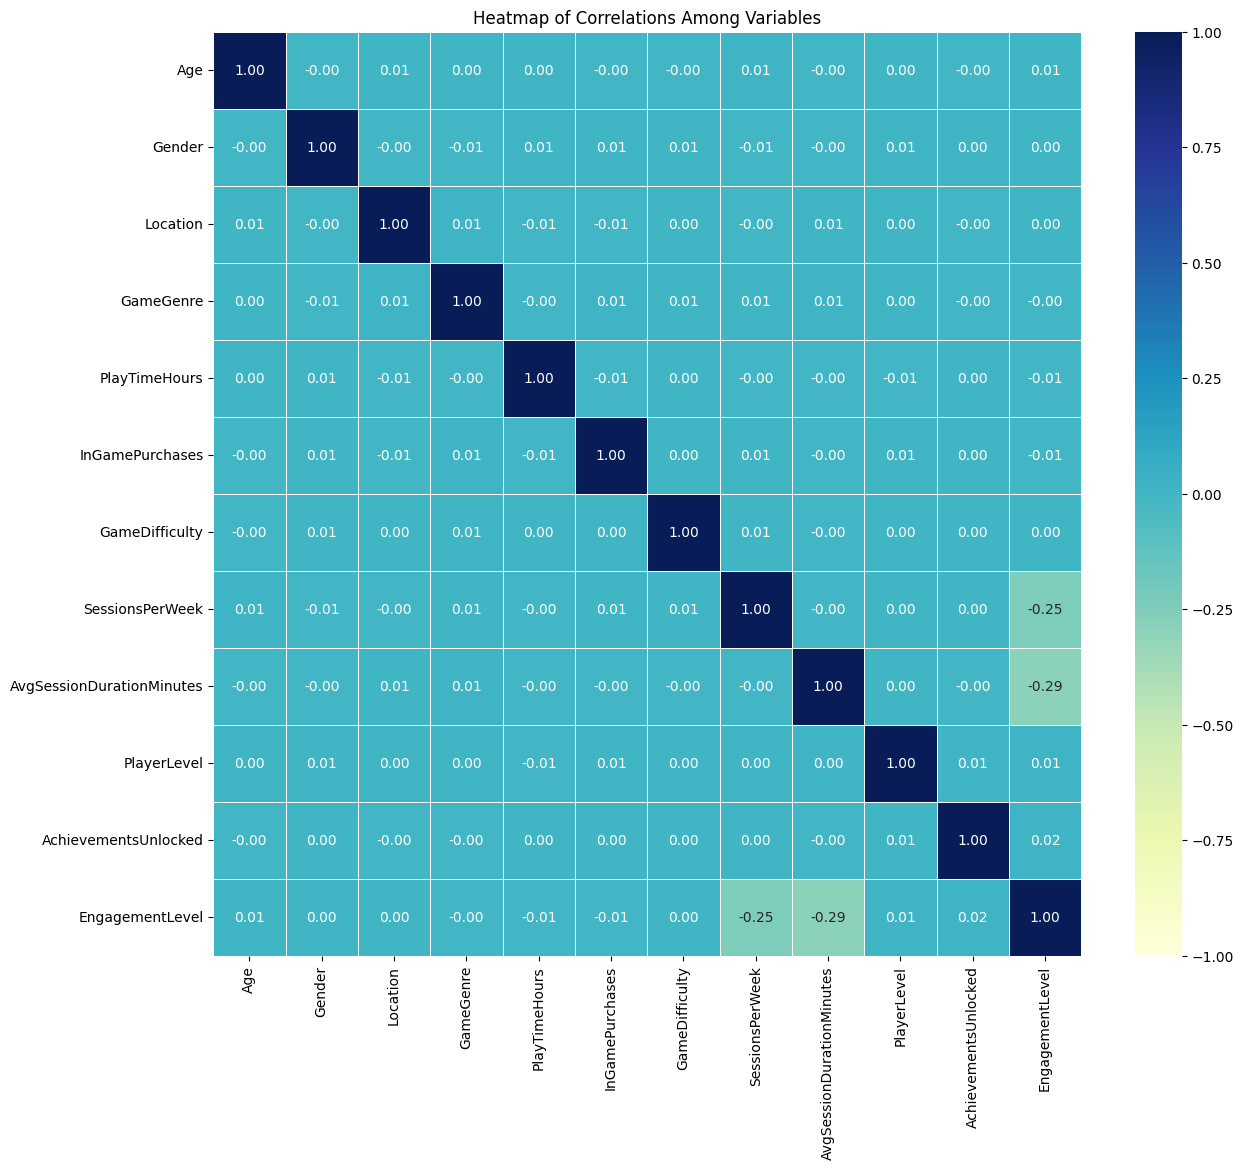

In [18]:
# Convert categorical variables to numeric codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes
df['GameGenre'] = df['GameGenre'].astype('category').cat.codes
df['GameDifficulty'] = df['GameDifficulty'].astype('category').cat.codes
df['InGamePurchases'] = df['InGamePurchases'].astype('category').cat.codes
df['EngagementLevel'] = df['EngagementLevel'].astype('category').cat.codes

# Select relevant columns for the heatmap
heatmap_data = df[['Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours', 'InGamePurchases', 
                   'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 
                   'AchievementsUnlocked', 'EngagementLevel']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Among Variables')
plt.show()

# Algorithms

In [19]:
# Define features and target
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

In [20]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define models
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier())
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', lgb.LGBMClassifier())
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
}

In [22]:
# Train and evaluate models
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print(f"Confusion Matrix for {name}:\n{conf_matrix}")
    print("-" * 50)

Training and evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.82
Confusion Matrix for Logistic Regression:
[[1672   59  304]
 [  61 1468  564]
 [ 147  295 3437]]
--------------------------------------------------
Training and evaluating Random Forest...
Accuracy for Random Forest: 0.91
Confusion Matrix for Random Forest:
[[1775   69  191]
 [  60 1839  194]
 [  94  113 3672]]
--------------------------------------------------
Training and evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.91
Confusion Matrix for Gradient Boosting:
[[1787   67  181]
 [  62 1800  231]
 [ 103  114 3662]]
--------------------------------------------------
Training and evaluating Support Vector Machine...
Accuracy for Support Vector Machine: 0.89
Confusion Matrix for Support Vector Machine:
[[1748   65  222]
 [  58 1756  279]
 [ 107  136 3636]]
--------------------------------------------------
Training and evaluating K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors

*  **Logistic Regression** has the lowest accuracy among the models, with a notable number of misclassifications in the 'Low' engagement level category, as seen in the confusion matrix. The model is better at identifying 'Medium' and 'High' engagement levels but struggles more with 'Low'.
*  **Random Forest** shows strong performance with high accuracy. It effectively identifies 'Medium' engagement levels and performs well on 'High' and 'Low' as well, with fewer misclassifications compared to Logistic Regression.
* **Gradient Boosting** also performs well, similar to Random Forest, with high accuracy. It shows a slightly different pattern in misclassifications but is generally effective at classifying all engagement levels.
* **SVM** has good accuracy, though it shows a bit more difficulty with the 'Low' engagement level compared to the top-performing models. It's slightly less effective than Random Forest and Gradient Boosting but still performs well overall.
* **KNN** has the lowest accuracy among the models, with substantial misclassifications, particularly for 'Low' engagement level. It performs significantly worse than the other models, which may be due to its sensitivity to the choice of 'k' and the distance metric.
* **LightGBM** has the highest accuracy of all models. It performs very well across all engagement levels with minimal misclassifications, making it the best-performing model in this evaluation.


----------------------------------------------------------------------------
**Summary**
* **Best Model:** LightGBM with an accuracy of 0.92, performing well across all engagement levels.
* **Second Best:** Random Forest and Gradient Boosting, both with an accuracy of 0.91.
* **Moderate Performance:** Support Vector Machine with an accuracy of 0.89.
* **Lowest Performance:** K-Nearest Neighbors with an accuracy of 0.74.